In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
sample_a = pd.read_csv('ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('ab_test-redesign_sample_b.csv')

Каждая таблица имеет следующие поля:

date — дата наблюдения;
cid — идентификатор посетителя;
transactions — количество совершённых целевых действий (транзакций);
revenue — сумма покупки;
group — группа (тестовая — А, контрольная — B).

Задание 4.6
3 points possible (ungraded)
Постройте таблицу со следующими ежедневными показателями:

количество посетителей сайта;
суммарное число транзакций;
общая сумма покупок (выручка).
Для этого сгруппируйте данные по признаку date, предварительно преобразовав его к типу datetime.

Чему равны значения ежедневных показателей в группе А на 8 ноября 2020 года?

In [96]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61571 non-null  object 
 1   cid           61571 non-null  float64
 2   transactions  61571 non-null  int64  
 3   revenue       61571 non-null  int64  
 4   group         61571 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [97]:
sample_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61383 non-null  object 
 1   cid           61383 non-null  float64
 2   transactions  61383 non-null  int64  
 3   revenue       61383 non-null  int64  
 4   group         61383 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [98]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')

In [99]:
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')

In [100]:
new_sample_a = sample_a.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
new_sample_a.head()

,date,users_count,transactions,revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984


In [101]:
new_sample_b = sample_b.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
new_sample_b.head()

,date,users_count,transactions,revenue
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726


Задание 4.7
2 points possible (ungraded)
Добавьте в каждую из таблиц кумулятивные метрики:

кумулятивное количество посетителей сайта;
кумулятивное суммарное число транзакций;
кумулятивная общая сумма покупок (кумулятивная выручка).
Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).

Чему равна средняя кумулятивная конверсия в группах за весь период проведения A/B-теста? Ответ округлите до сотых, знаки процентов не вводите.

In [102]:
# считаем кумулятивное количество посетителей
new_sample_a.loc[:, 'cum_users_count'] = new_sample_a['users_count'].cumsum()
# считаем кумулятивное количество транзакций
new_sample_a.loc[:, 'cum_transactions'] = new_sample_a['transactions'].cumsum()
# считаем кумулятивную выручку
new_sample_a.loc[:, 'cum_revenue'] = new_sample_a['revenue'].cumsum()
# выводим данные
display(new_sample_a[['date', 'users_count', 'transactions', 'revenue', 'cum_users_count', 'cum_transactions', 'cum_revenue']].head())

,date,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue
0,2020-11-06,2576,16,1577279,2576,16,1577279
1,2020-11-07,2704,23,1721886,5280,39,3299165
2,2020-11-08,3354,25,846051,8634,64,4145216
3,2020-11-09,3234,18,708830,11868,82,4854046
4,2020-11-10,3022,29,826984,14890,111,5681030


In [103]:
# считаем кумулятивное количество посетителей
new_sample_b.loc[:, 'cum_users_count'] = new_sample_b['users_count'].cumsum()
# считаем кумулятивное количество транзакций
new_sample_b.loc[:, 'cum_transactions'] = new_sample_b['transactions'].cumsum()
# считаем кумулятивную выручку
new_sample_b.loc[:, 'cum_revenue'] = new_sample_b['revenue'].cumsum()
# выводим данные
display(new_sample_b[['date', 'users_count', 'transactions', 'revenue', 'cum_users_count', 'cum_transactions', 'cum_revenue']].head())

,date,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue
0,2020-11-06,2499,19,996645,2499,19,996645
1,2020-11-07,2804,19,555499,5303,38,1552144
2,2020-11-08,3291,24,3044842,8594,62,4596986
3,2020-11-09,3062,25,1285836,11656,87,5882822
4,2020-11-10,3072,30,2414726,14728,117,8297548


Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).
После этого рассчитаем кумулятивную конверсию — это отношение ежедневной кумулятивной суммы количества посетителей к ежедневной кумулятивной сумме количества совершённых целевых действий:

In [104]:
# вычисляем кумулятивную сумму количества посетителей
new_sample_a['cum_users_count'] = new_sample_a.groupby(['date'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
new_sample_a['cum_transactions'] = new_sample_a.groupby(['date'])['transactions'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
new_sample_a['cum_revenue'] = new_sample_a.groupby(['date'])['revenue'].cumsum()
# вычисляем кумулятивную конверсию
new_sample_a['cum_conversion'] = new_sample_a['cum_transactions']/new_sample_a['cum_users_count'] * 100
new_sample_a['cum_mean_bill'] = new_sample_a['cum_revenue']/new_sample_a['cum_transactions'] * 100

display(new_sample_a.head())

,date,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue,cum_conversion,cum_mean_bill
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,9.857994e+06
1,2020-11-07,2704,23,1721886,2704,23,1721886,0.850592,7.486461e+06
2,2020-11-08,3354,25,846051,3354,25,846051,0.745379,3.384204e+06
3,2020-11-09,3234,18,708830,3234,18,708830,0.556586,3.937944e+06
4,2020-11-10,3022,29,826984,3022,29,826984,0.959629,2.851669e+06


In [105]:
mean_conv_a=new_sample_a['cum_conversion'].mean()
display(round(mean_conv_a, 2))

0.72

In [106]:
# вычисляем кумулятивную сумму количества посетителей
new_sample_b['cum_users_count'] = new_sample_b.groupby(['date'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
new_sample_b['cum_transactions'] = new_sample_b.groupby(['date'])['transactions'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
new_sample_b['cum_revenue'] = new_sample_b.groupby(['date'])['revenue'].cumsum()
# вычисляем кумулятивную конверсию
new_sample_b['cum_conversion'] = new_sample_b['cum_transactions']/new_sample_b['cum_users_count'] * 100
new_sample_b['cum_mean_bill'] = new_sample_b['cum_revenue']/new_sample_b['cum_transactions'] * 100

display(new_sample_b.head())

,date,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue,cum_conversion,cum_mean_bill
0,2020-11-06,2499,19,996645,2499,19,996645,0.760304,5.245500e+06
1,2020-11-07,2804,19,555499,2804,19,555499,0.677603,2.923679e+06
2,2020-11-08,3291,24,3044842,3291,24,3044842,0.729262,1.268684e+07
3,2020-11-09,3062,25,1285836,3062,25,1285836,0.816460,5.143344e+06
4,2020-11-10,3072,30,2414726,3072,30,2414726,0.976562,8.049087e+06


In [107]:
mean_conv_b=new_sample_b['cum_conversion'].mean()
display(round(mean_conv_b, 2))

0.76

Задание 4.8
1 point possible (ungraded)
Постройте графики кумулятивной конверсии в каждой группе. Какие выводы по ним вы можете сделать?

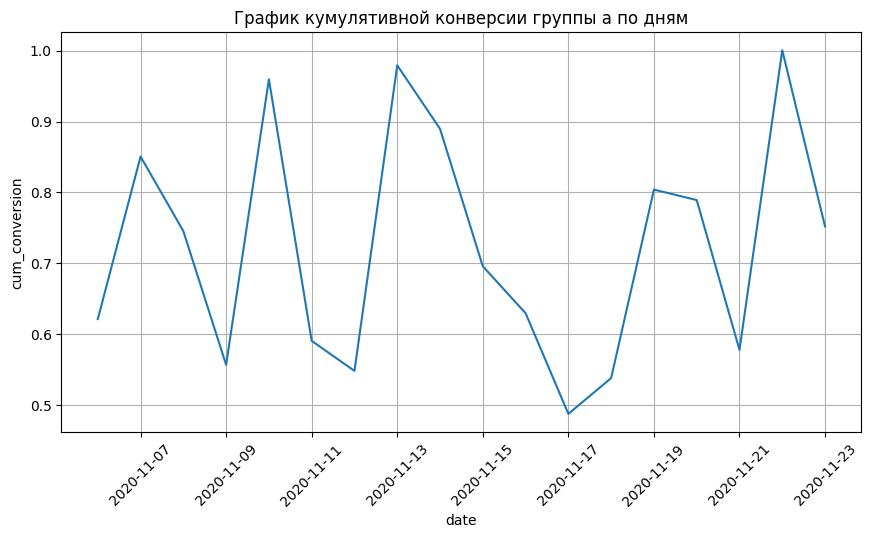

In [108]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=new_sample_a, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии группы a по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

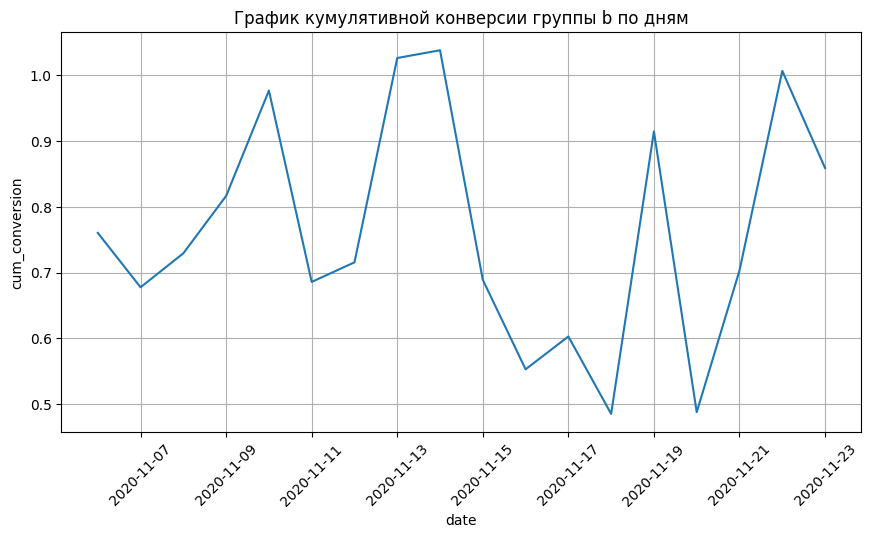

In [109]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=new_sample_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии группы b по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

Задание 4.9
1 point possible (ungraded)
Постройте графики кумулятивного среднего чека в каждой группе. Какие выводы по ним вы можете сделать?

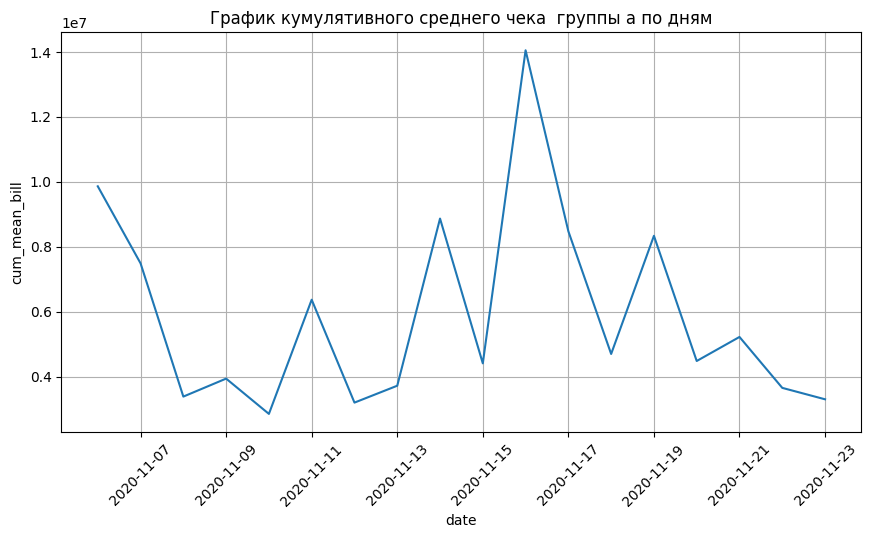

In [110]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_mean_bill', data=new_sample_a, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека  группы a по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

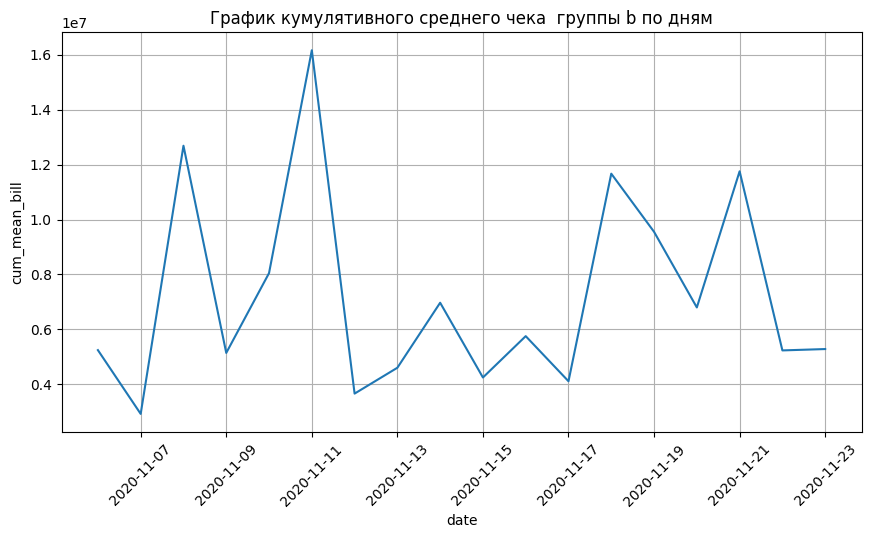

In [111]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_mean_bill', data=new_sample_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека  группы b по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

Проверьте гипотезу о равенстве конверсий в группах А и B при альтернативной гипотезе: Конверсия в группе А меньше, чем конверсия в группе B. Используйте функцию proportions_ztest() из модуля statsmodels.stats.proportion. В качестве уровня значимости возьмите .

Каковы результаты тестирования?

 Применим z-тест для пропорций на примере конверсии нашего интернет-магазина. 
 Импортируем функцию proportions_ztest() из модуля statsmodels.
 Напомним, что для получения z-статистики и p-value нам необходимо передать в функцию следующие аргументы:

count — количество «успехов» (в каждой из групп). В нашем случае — количество пользователей, которые совершили целевое действие в каждой группе.
nobs — количество наблюдений (в каждой из групп), то есть размер выборки.
alternative — альтернативная гипотеза. Может быть: 'two-sided' — двусторонняя, 'smaller' — левосторонняя, 'larger' — правосторонняя. По умолчанию параметр равен 'two-sided'. 

In [112]:
from statsmodels.stats.proportion import proportions_ztest

In [113]:
converted_piv= new_sample_b[['users_count', 'transactions']].agg(
    ['sum', 'count']
)
display(converted_piv)

,users_count,transactions
sum,61383,463
count,18,18


In [114]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['transactions'], #число "успехов"
    nobs=converted_piv['users_count'], #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value > alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.0
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


Задание 5.3
1/1 point (ungraded)
Проверьте гипотезу о нормальности распределений ежедневного среднего чека с помощью критерия Шапиро-Уилка. В качестве уровня значимости возьмите alpha=0.1

Каковы результаты тестирования?

# Проверка данных на нормальность
## Тест Шапиро-Уилка

In [115]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

In [116]:
alpha = 0.1

In [120]:
import pandas as pd #для работы с таблицами
import numpy as np
from scipy.stats import shapiro
from sklearn import preprocessing


In [122]:
#сделаем тест для каждой из двух выборок.
_, p = shapiro(new_sample_a['cum_revenue'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.001
Данные не распределены нормально (мы отвергаем H0)


In [123]:
#сделаем тест для каждой из двух выборок.
_, p = shapiro(new_sample_b['cum_revenue'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.482
Данные распределены нормально


Задание 5.4
1/1 point (ungraded)
Проверьте гипотезу о равенстве ежедневных средних чеков с помощью критерия Манна-Уитни при альтернативной гипотезе: Ежедневный средний чек в группе А меньше, чем в группе B. Используйте функцию mannwhitneyu() из модуля scipy.stats. В качестве уровня значимости возьмите alpha=0.1.

Каковы результаты тестирования?

## Критерий Манна-Уитни

In [124]:
from scipy.stats import mannwhitneyu

In [132]:
H0 = 'Средние чеки равны'
H1 = ' Ежедневный средний чек в группе А меньше, чем в группе B(мы отвергаем H0)'

In [133]:
alpha = 0.1 #уровень значимости
#вычисляем результат T-теста для выборок
results = mannwhitneyu(
    x=new_sample_a['revenue'],
    y=new_sample_b['revenue']
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue > alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

p-value: 0.12
Отвергаем нулевую гипотезу. Средние чеки равны
Альтернативная гипотеза. H1:  Ежедневный средний чек в группе А меньше, чем в группе B(мы отвергаем H0)


In [128]:
import scipy.stats as stats
stats.mannwhitneyu(new_sample_a['revenue'], new_sample_b['revenue'], use_continuity=True)

MannwhitneyuResult(statistic=112.0, pvalue=0.11732270519879959)

In [127]:
converted_piv= new_sample_b[['users_count', 'cum_revenue']].agg(
    ['sum', 'mean']
)
display(converted_piv)

,users_count,cum_revenue
sum,61383.000000,32454342.0
mean,3410.166667,1803019.0


In [125]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['transactions'], #число "успехов"
    nobs=converted_piv['users_count'], #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value > alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 

KeyError: 'y'